# Delivery_time -> Predict delivery time using sorting time 

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
import statsmodels. formula. api as smf
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
# import dataset
dataset=pd.read_csv("C:/Users/lenovo/Downloads/delivery_time.csv")

In [3]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
dataset.shape


(21, 2)

In [8]:
#renaming Columns
dataset=dataset.rename({'Delivery Time': 'DT', 'Sorting Time':'ST'},axis=1)
dataset

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
print(kurtosis(dataset.DT))

-0.02558576894549036


In [10]:
print(kurtosis(dataset.ST))

-1.1653901357029155


In [11]:
print(skew(dataset.DT))

0.326702631656106


In [12]:
print(skew(dataset.ST))

0.043680994983108075


In [13]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [14]:
dataset[dataset.duplicated()].shape

(0, 2)

# Graphical reprsentation

<AxesSubplot:>

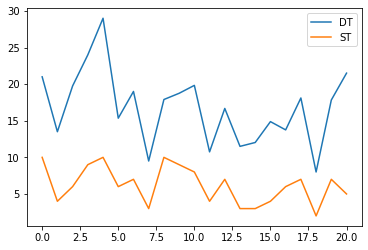

In [15]:
dataset.plot()

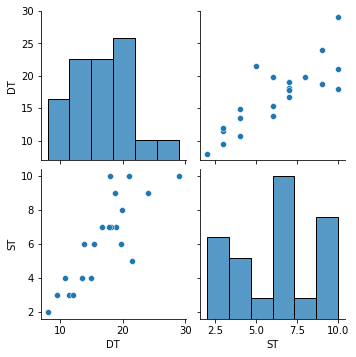

In [16]:
sns.pairplot(dataset)

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

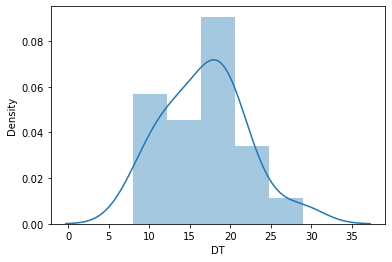

In [17]:
sns.distplot(dataset['DT'])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

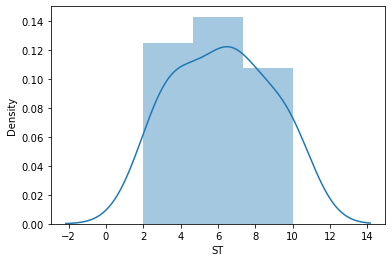

In [18]:
sns.distplot(dataset['ST'])

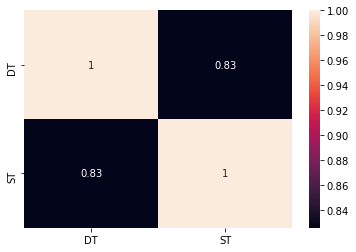

In [19]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:>

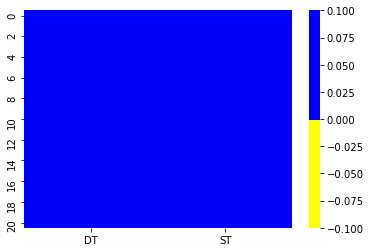

In [20]:
cols = dataset.columns 
colours = ['yellow', 'blue']
sns.heatmap(dataset[cols].isnull(),
            cmap=sns.color_palette(colours))

<AxesSubplot:>

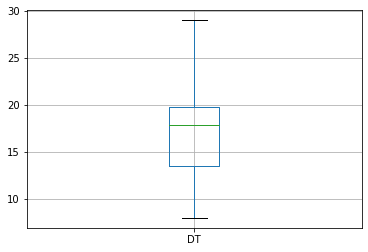

In [21]:
dataset.boxplot(column=['DT'])

<AxesSubplot:>

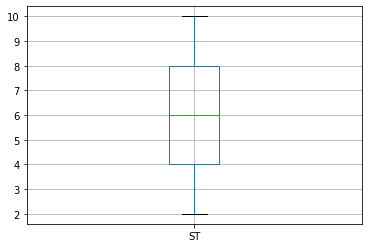

In [22]:
dataset.boxplot(column=['ST'])

<AxesSubplot:>

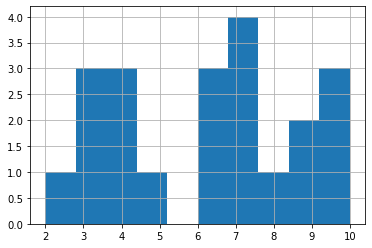

In [23]:
dataset['ST'].hist()

<AxesSubplot:>

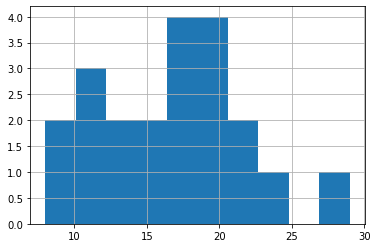

In [24]:
dataset['DT'].hist()

<AxesSubplot:>

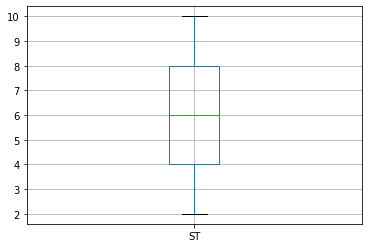

In [25]:
dataset.boxplot('ST')

<AxesSubplot:>

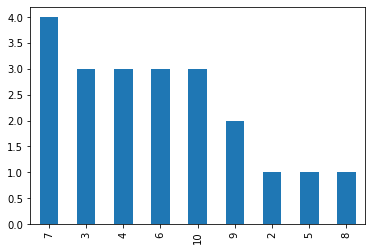

In [26]:
dataset['ST'].value_counts().plot.bar()

# Correlation analysis

In [27]:
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:xlabel='ST', ylabel='DT'>

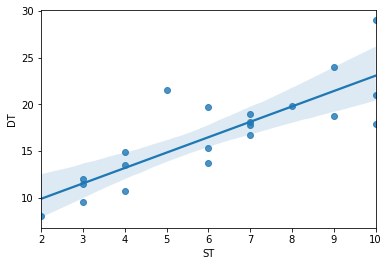

In [28]:
sns.regplot(x=dataset['ST'],y=dataset['DT'])

# Model Testing 

In [29]:
model = smf.ols("DT~ST",data = dataset).fit()
model

In [30]:
#fiinding coefficient parameters 
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [31]:
#finding t values and p values
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [32]:
#finding Rsqaured values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model summary

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


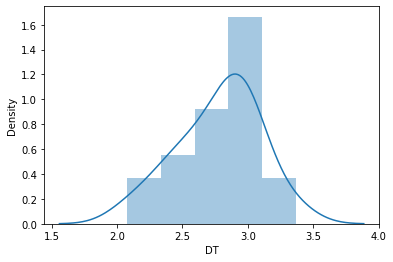

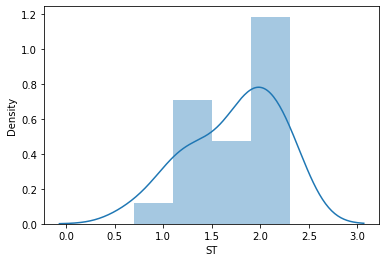

<Figure size 432x288 with 0 Axes>

In [33]:
dataset=dataset
dataset['DT'] = np.log(dataset['DT'])
dataset['ST'] = np.log(dataset['ST'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()


In [34]:
model=smf.ols("DT~ST",data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.60e-07
Time:                        22:59:31   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


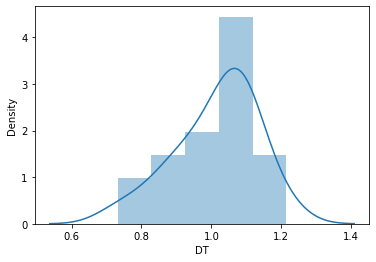

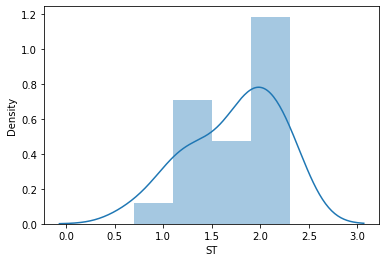

<Figure size 432x288 with 0 Axes>

In [35]:
dataset2=dataset
dataset['DT'] = np.log(dataset['DT'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()

In [36]:
model_3 = smf.ols("ST~DT",data = dataset2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           9.13e-08
Time:                        22:59:32   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DT             3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


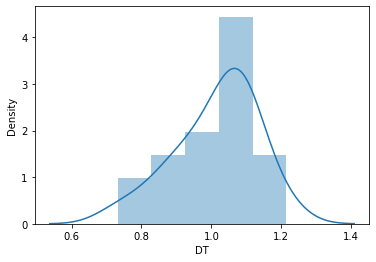

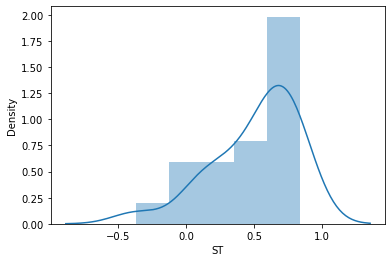

<Figure size 432x288 with 0 Axes>

In [37]:
dataset3=dataset
dataset['ST'] = np.log(dataset['ST'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()

In [38]:
model_4 = smf.ols("ST~DT",data = dataset3).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           4.05e-08
Time:                        22:59:33   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model prediction

In [39]:
# Manual prediction for say sorting time 8
DT = ( 6.582734) + (1.649020)*(8)
DT 

19.774894

In [40]:
# Automamtic prediction For sa sorting time 8,10
new_data=pd.Series([8,10])
new_data

0     8
1    10
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data, columns=['ST'])
data_pred

,ST
0,8
1,10


In [42]:
model.predict(data_pred)

0    6.522166
1    7.717210
dtype: float64

# Salary_hike -> Build a prediction model for Salary_hike

In [43]:
#import dataset
data1=pd.read_csv("C:/Users/lenovo/Downloads/Salary_Data.csv")

In [44]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Graphical representation

<AxesSubplot:>

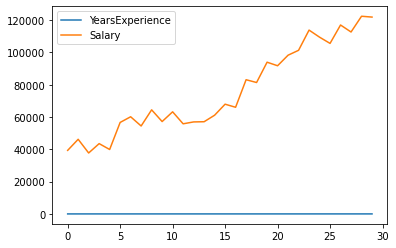

In [47]:
data1.plot()

In [48]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [49]:
data1.Salary

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [50]:
data1.YearsExperience

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

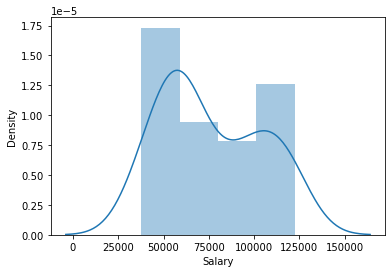

In [51]:
sns.distplot(data1['Salary'])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

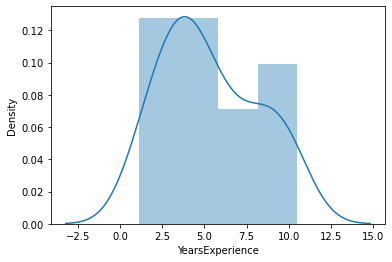

In [52]:
sns.distplot(data1['YearsExperience'])

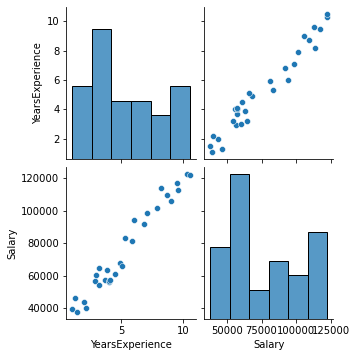

In [53]:
sns.pairplot(data1)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

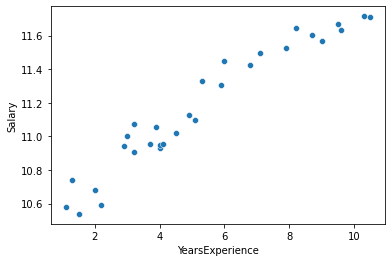

In [54]:
sns.scatterplot(x=data1.YearsExperience, y=np.log(data1.Salary), data=data1)


# EDA and Data Visualization 

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

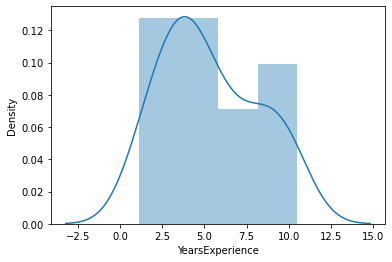

In [56]:
sns.distplot(data1['YearsExperience'])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

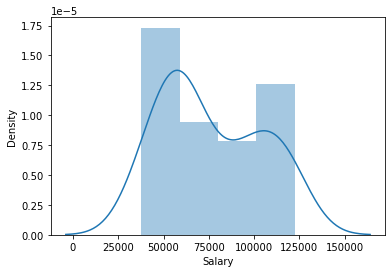

In [57]:
sns.distplot(data1['Salary'])

# Correlation Analysis

In [58]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

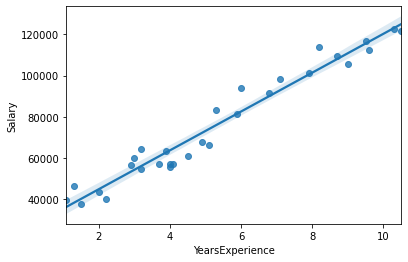

In [59]:
sns.regplot(x=data1['YearsExperience'],y=data1['Salary'])

In [60]:
model=smf.ols("Salary~YearsExperience	",data=data1).fit()
model

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        22:59:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [62]:
#fiinding coefficient parameters 
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
#finding t values and p values
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [64]:
#finding Rsqaured values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [65]:
# predict for 4 & 5 years experience 
new_data1=pd.Series([4,5])
new_data1

0    4
1    5
dtype: int64

In [66]:
data_pred1=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,8
1,10


In [67]:
model.predict(data_pred1)

0    101391.898770
1    120291.823413
dtype: float64